## Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# import DATA
df = pd.read_csv('H:/ExcelR Data Science/datasets_BA/Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.shape

(600, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df['Taxable.Income'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

In [6]:
#Creating a new column called Fraud_Check 
group_names = ['Risky', 'Not Risky']
df['Fraud_Check']=pd.cut(df['Taxable.Income'], bins = [0,30000,1000000], labels = group_names)


In [7]:
df[['Taxable.Income','Fraud_Check']].head(10)

,Taxable.Income,Fraud_Check
0,68833,Not Risky
1,33700,Not Risky
2,36925,Not Risky
3,50190,Not Risky
4,81002,Not Risky
5,33329,Not Risky
6,83357,Not Risky
7,62774,Not Risky
8,83519,Not Risky
9,98152,Not Risky


In [8]:
df['Fraud_Check'].value_counts()

Not Risky    476
Risky        124
Name: Fraud_Check, dtype: int64

In [9]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud_Check
0,NO,Single,68833,50047,10,YES,Not Risky
1,YES,Divorced,33700,134075,18,YES,Not Risky
2,NO,Married,36925,160205,30,YES,Not Risky
3,YES,Single,50190,193264,15,YES,Not Risky
4,NO,Married,81002,27533,28,NO,Not Risky


In [10]:
# label encoding categorical columns
cols=['Undergrad','Marital.Status','Urban','Fraud_Check']  
le=preprocessing.LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])
    print(le.classes_)

['NO' 'YES']
['Divorced' 'Married' 'Single']
['NO' 'YES']
['Not Risky' 'Risky']


In [11]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud_Check
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [12]:
# splitting data into x and y
array=df.values
x=array[:,:-1]
y=array[:,-1]

In [13]:
# splitting data into train and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

## Building decision tree using Gini impurity as criterion

In [14]:
model1 = DecisionTreeClassifier(criterion='gini',random_state=30,)
model1.fit(x_train, y_train)

DecisionTreeClassifier(random_state=30)

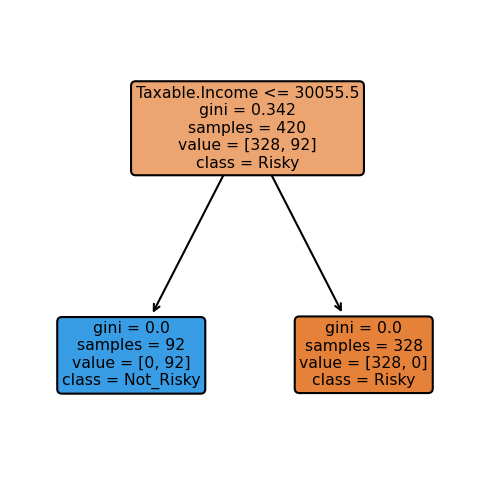

In [15]:
fn=['UnderGrad', 'Marital.Status', 'Taxable.Income', 'City.Population', 'Work.Experience','Urban']
cn=['Risky', 'Not_Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=150)
tree.plot_tree(model1,max_depth=3,feature_names = fn, class_names=cn,filled = True,rounded=True);


+ The root node is Taxable.Income which is the most important attribute in explaining the output variable.
+ This is consistent with the data as the output column was derived from taxable income so this column provides the maximum information about output column.

In [16]:
pred1 = model1.predict(x_test)

In [17]:
#Accuracy of model
from sklearn.metrics import confusion_matrix
conf_matrix1=confusion_matrix(y_test, pred1)
conf_matrix1

array([[148,   0],
       [  0,  32]], dtype=int64)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00        32

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



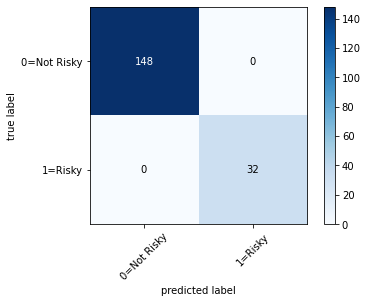

In [19]:
from mlxtend.plotting import plot_confusion_matrix
class_names = ['0=Not Risky', '1=Risky']
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix1,colorbar=True,show_absolute=True,show_normed=False,class_names=class_names)
plt.show()

## Building decision tree using entropy as criterion

In [20]:
model2=DecisionTreeClassifier(criterion='entropy',random_state=30)
model2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=30)

In [21]:
pred2 = model2.predict(x_test)

In [22]:
#Accuracy of model
conf_matrix2=confusion_matrix(y_test, pred2)
conf_matrix2

array([[148,   0],
       [  0,  32]], dtype=int64)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00        32

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



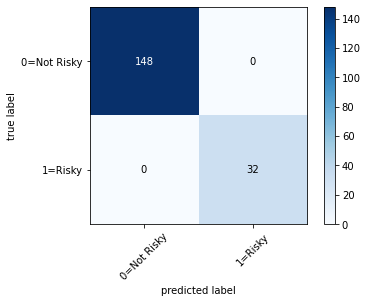

In [24]:
from mlxtend.plotting import plot_confusion_matrix
class_names = ['0=Not Risky', '1=Risky']
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix2,colorbar=True,show_absolute=True,show_normed=False,class_names=class_names)
plt.show()

## Using GridSearchCV

In [25]:
model3 = DecisionTreeClassifier()

In [26]:
from sklearn.model_selection import GridSearchCV
param_grid={'criterion':['gini','entropy'],
            'min_samples_split':[10,20,30,40],
            'max_depth':[2,3,5,7,10]}
            
grid_dt=GridSearchCV(model3,param_grid,scoring='accuracy',refit = True,cv=5)

# fitting the model for grid search 
grid_dt.fit(x_train, y_train) 

# print best parameter after tuning 
print(grid_dt.best_params_) 

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 10}


In [27]:
# Prediction and accuracy using test set
grid_pred = grid_dt.predict(x_test) 
   
# print classification report 
print(classification_report(y_test, grid_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00        32

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [28]:
conf_matrix3=confusion_matrix(y_test, grid_pred)
conf_matrix3

array([[148,   0],
       [  0,  32]], dtype=int64)

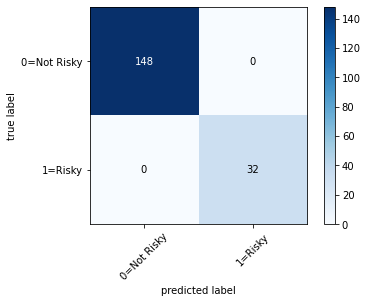

In [29]:
class_names = ['0=Not Risky', '1=Risky']
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix3,colorbar=True,show_absolute=True,show_normed=False,class_names=class_names)
plt.show()

###  As the output column(Fraud_check) was derived purely from taxable income column, the decision trees has easily predicted all the labels correctly.Thus all the models overall accuracy and precision and recall have values of 1 which is an ideal scenario and not a real one.